In [1]:
from label_names import *
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image,ImageFilter
from scipy.ndimage.filters import gaussian_filter

path = os.getcwd()
if path.split('/')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
from src.engine import Engine
from src.core.criterions import *
from src.utils.util import *
%matplotlib inline

# Load a model

In [3]:
config_path = 'configs/mln_resnet18_oxfordpets.yml'
save_dir = '/home/yo0n/바탕화면/RIL/ucam/notebook_test'
logger = load_log(save_dir)
checkpoint_path = '/home/yo0n/바탕화면/RIL/ucam/ckpt_pets/checkpoint_best.pth'

In [4]:
engine = Engine(config_path, logger, save_dir,device='cuda')
engine.model_config['checkpoint_path'] = checkpoint_path
engine.define()


[2021-11-04 21:49:43,711 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] GPU is available.


Build a dataloader
Build a model


[2021-11-04 21:49:47,900 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] SGD opimizer is built.
[2021-11-04 21:49:47,900 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] CUSTOM scheduler is built.
[2021-11-04 21:49:47,901 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Criterion is built.
[2021-11-04 21:49:47,901 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Loss meter is built.
[2021-11-04 21:49:47,902 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Checkpointer is built.
[2021-11-04 21:49:47,902 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Loading checkpoint from /home/yo0n/바탕화면/RIL/ucam/ckpt_pets/checkpoint_best.pth
[2021-11-04 21:49:48,141 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Localizer is built.
[2021-11-04 21:49:48,141 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Evaluators are built.


In [5]:
engine._validate_once(0)

/home/yo0n/.local/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
[2021-11-04 21:49:49,360 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] [Epoch 0] Evaluation batch 1/58
[2021-11-04 21:49:49,756 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] [Epoch 0] Evaluation batch 2/58
[2021-11-04 21:49:50,156 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] [Epoch 0] Evaluation batch 3/58
[2021-11-04 21:49:50,523 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] [Epoch 0] Evaluation batch 4/58
[2021-11-04 21:49:50,868 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] [Epoch 0] Evaluation batch 5/58
[2021-11-04 21:49:51,240 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] [Epoch 0] Evaluation batch 6/58
[2021-11-04 21:49:51,594 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] [Epoch 0] Evaluation batch 7/58
[2021-11-04 21:49:51,972 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] [Epoch 0] Evaluation batch 8/58

0.0031123139377537213

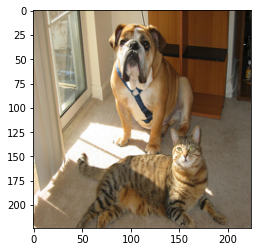

In [6]:
cat_and_dog = Image.open("./data/notebook/cat_and_dog.png")
cat_and_dog = cat_and_dog.convert("RGB")
cat_and_dog = cat_and_dog.resize((224, 224))
plt.imshow(cat_and_dog)

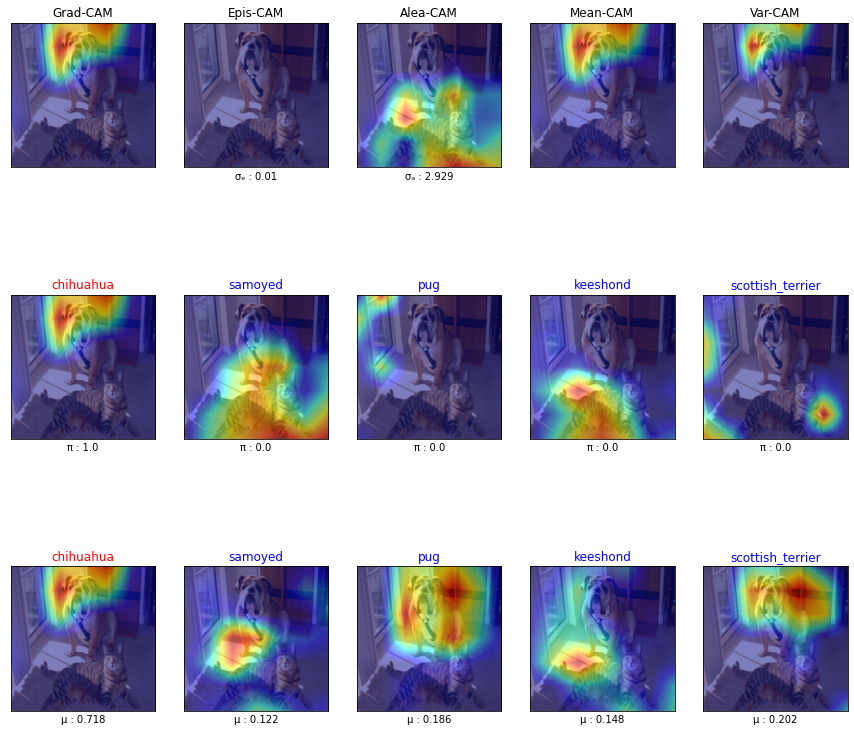

In [7]:
plot_func(engine, cat_and_dog, dataset='oxfordpets') 

## CutOut Images

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


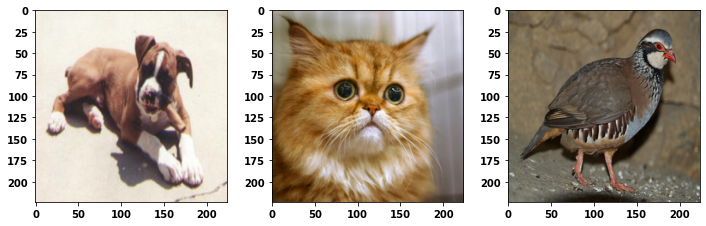

In [7]:
dog_img = Image.open("/sdb/ImageNet1K/train/n02108089/n02108089_315.JPEG")
dog_img = dog_img.resize((224, 224), Image.ANTIALIAS)

cat_img = Image.open("/sdb/ImageNet1K/train/n02123394/n02123394_274.JPEG")
cat_img = cat_img.resize((224, 224), Image.ANTIALIAS)

bird_img = Image.open("/sdb/ImageNet1K/train/n01797886/n01797886_35.JPEG")
bird_img = bird_img.resize((224, 224), Image.ANTIALIAS)

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.imshow(dog_img)
plt.subplot(3,3,2)
plt.imshow(cat_img)
plt.subplot(3,3,3)
plt.imshow(bird_img)

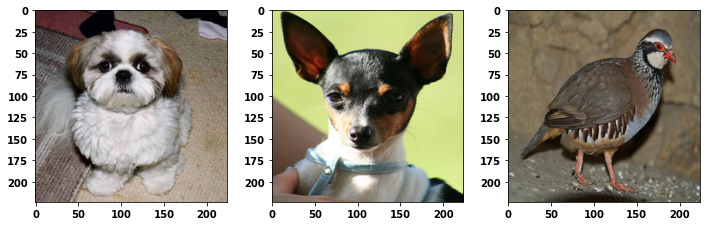

In [8]:
dog_img2 = Image.open("/sdb/ImageNet1K/train/n02086240/n02086240_146.JPEG")
dog_img2 = dog_img2.resize((224, 224), Image.ANTIALIAS)

dog_img3 = Image.open("/sdb/ImageNet1K/train/n02087046/n02087046_436.JPEG")
dog_img3 = dog_img3.resize((224, 224), Image.ANTIALIAS)

bird_img = Image.open("/sdb/ImageNet1K/train/n01797886/n01797886_35.JPEG")
bird_img = bird_img.resize((224, 224), Image.ANTIALIAS)

plt.figure(figsize=(12,12)) 
plt.subplot(3,3,1)
plt.imshow(dog_img2)
plt.subplot(3,3,2)
plt.imshow(dog_img3)
plt.subplot(3,3,3)
plt.imshow(bird_img)

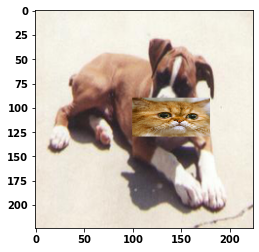

In [9]:
def cutout_func(img1, img2, bbox1, bbox2):
    patch = img2[bbox2[0]:bbox2[2], bbox2[1]:bbox2[3]]
    patch = cv2.resize(patch, dsize=(bbox1[3]-bbox1[1], bbox1[2]-bbox1[0]), interpolation=cv2.INTER_CUBIC)
    img1[bbox1[0]:bbox1[2], bbox1[1]:bbox1[3]] = patch
    
    #plt.subplot(2,2,1)
    #plt.imshow(img1[bbox1[0]:bbox1[2], bbox1[1]:bbox1[3]])
    #plt.subplot(2,2,2)
    #plt.imshow(patch)
    
    return img1

#img_cutout = cutout_func(np.array(dog_img), np.array(cat_img), [30,100,130,180],[20,20,180,180])
#img_cutout = cutout_func(np.array(dog_img), np.array(cat_img), [30,100,90,180],[20,20,180,180])
img_cutout = cutout_func(np.array(dog_img), np.array(cat_img), [90,100,130,180],[20,20,180,180])
#img_cutout = cutout_func(np.array(cat_img), np.array(dog_img), [50,50,150,150],[30,130,160,160])
plt.imshow(img_cutout)

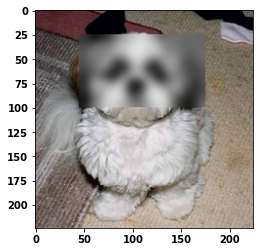

In [21]:
def blur_func(img,bbox,sigma=5):
   
    patch = img[bbox[0]:bbox[2],bbox[1]:bbox[3]]
    blurred = gaussian_filter(patch, sigma=sigma)
    
    img[bbox[0]:bbox[2],bbox[1]:bbox[3]] = blurred
    
    return img

blur_img = blur_func(np.array(dog_img2), [25,45,100,175])
plt.imshow(blur_img)

37 4 torch.Size([1, 25, 37])
37 10 torch.Size([1, 25, 37])
37 36 torch.Size([1, 25, 37])
37 10 torch.Size([1, 25, 37])
37 23 torch.Size([1, 25, 37])


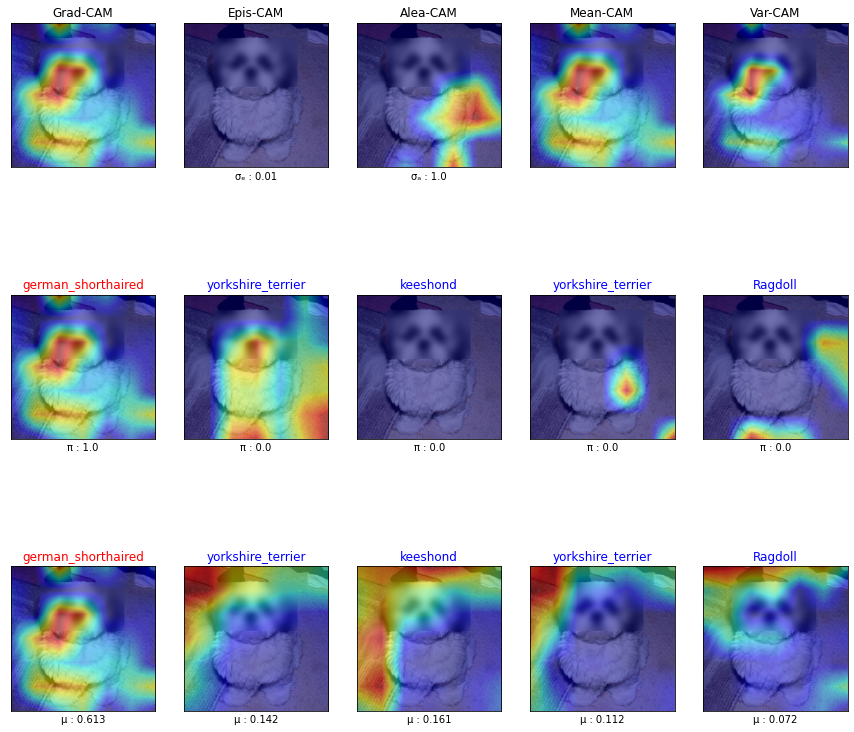

In [22]:
plot_func(engine, blur_img, dataset='oxfordpets')

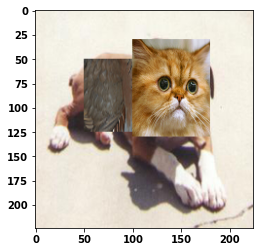

In [12]:
img_cutout2 = cutout_func(np.array(dog_img), np.array(cat_img), [30,100,130,180],[20,20,180,180])
img_cutout2 = cutout_func(np.array(img_cutout2), np.array(bird_img), [50,50,125,100],[75,75,130,160])

plt.imshow(img_cutout2)

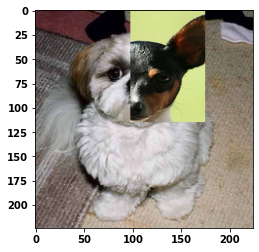

In [13]:
#img_cutout3 = cutout_func(np.array(dog_img), np.array(bird_img), [25,110,125,185],[25,165,80,201])
#img_cutout3 = cutout_func(np.array(dog_img), np.array(bird_img), [80,110,155,185],[25,165,80,201])

img_cutout3 = cutout_func(np.array(dog_img2), np.array(dog_img3), [1,98,115,175],[1,100,165,200])
#img_cutout3 = cutout_func(np.array(dog_img2), np.array(dog_img3), [5,5,60,210],[0,0,80,240])
plt.imshow(img_cutout3)

37 2 torch.Size([1, 25, 37])
37 19 torch.Size([1, 25, 37])
37 16 torch.Size([1, 25, 37])
37 3 torch.Size([1, 25, 37])
37 0 torch.Size([1, 25, 37])


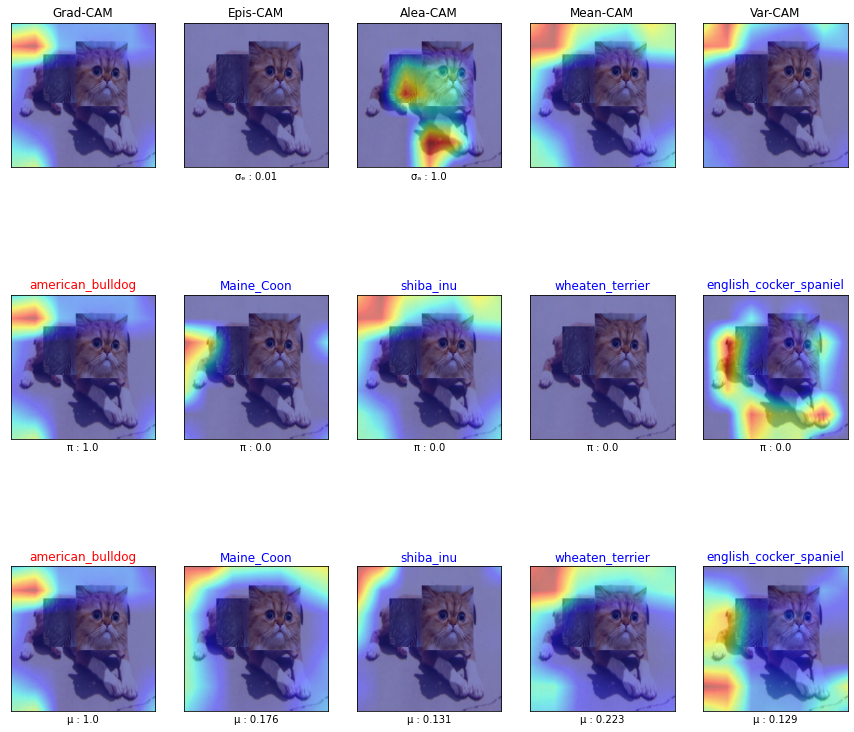

In [14]:
plot_func(engine, img_cutout2, dataset='oxfordpets')

## OxfordPets CAMs

./data/oxford_pets/havanese_152.jpg


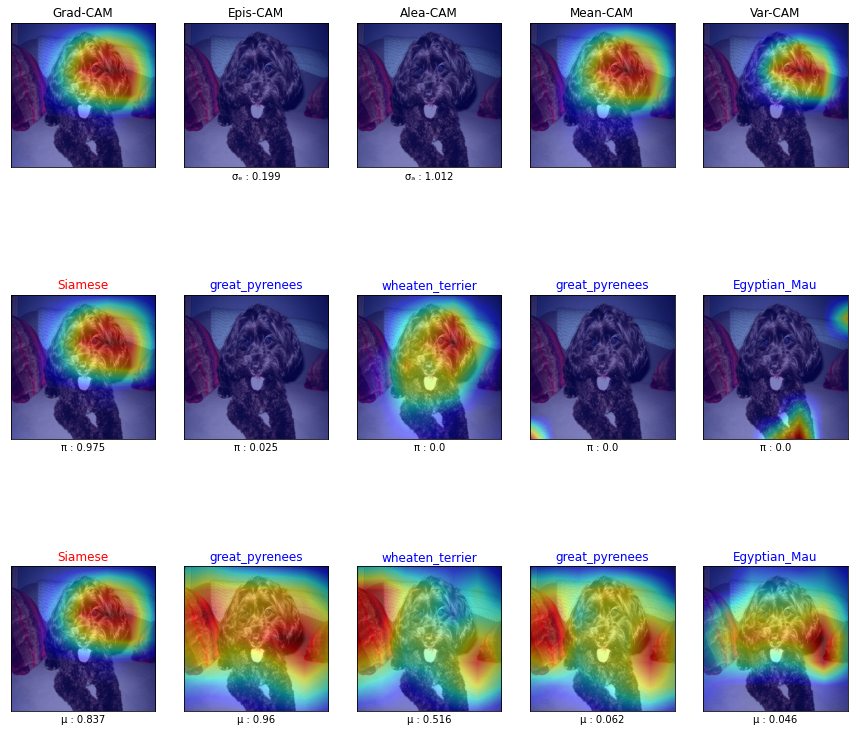

In [9]:
import random

pets_path ="./data/oxford_pets"
random_path = random.choice(os.listdir(pets_path))
full_path = pets_path + "/" + random_path
#full_path = "./data/oxford_pets/Russian_Blue_133.jpg"
print(full_path)

sample_img = Image.open(full_path)
sample_img = sample_img.convert('RGB')
sample_img = sample_img.resize((224, 224))

plot_func(engine, np.array(sample_img), dataset='oxfordpets')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(7) tensor(7)


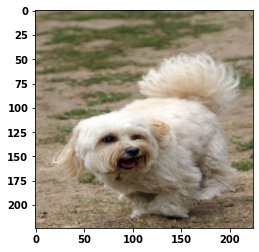

In [13]:
valimg, vallabel, _ =  engine.dataloaders['train'].dataset[7]
output_dict = engine.model(valimg.unsqueeze(0).cuda())
pi, mu, sigma = output_dict['pi'],output_dict['mu'],output_dict['sigma']

pi_entropies_inds = list(torch.argsort(pi[0],descending=True).cpu().numpy())
unct_out = mln_uncertainties(pi, mu, sigma)
sel_out = mln_gather(output_dict)

print(torch.argmax(sel_out['mu_sel']).cpu(), vallabel)

plt.imshow( (valimg.permute(1,2,0).numpy()*np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))) )

In [14]:
keys = list(engine.dataloaders['train'].dataset.class2idx.keys())
engine.dataloaders['train'].dataset.class2idx

{'leonberger': 0,
 'miniature_pinscher': 1,
 'Persian': 2,
 'Maine_Coon': 3,
 'wheaten_terrier': 4,
 'shiba_inu': 5,
 'samoyed': 6,
 'havanese': 7,
 'Sphynx': 8,
 'Siamese': 9,
 'Bengal': 10,
 'german_shorthaired': 11,
 'english_setter': 12,
 'Bombay': 13,
 'english_cocker_spaniel': 14,
 'yorkshire_terrier': 15,
 'Abyssinian': 16,
 'japanese_chin': 17,
 'great_pyrenees': 18,
 'newfoundland': 19,
 'saint_bernard': 20,
 'staffordshire_bull_terrier': 21,
 'chihuahua': 22,
 'beagle': 23,
 'scottish_terrier': 24,
 'american_pit_bull_terrier': 25,
 'pug': 26,
 'boxer': 27,
 'basset_hound': 28,
 'pomeranian': 29,
 'american_bulldog': 30,
 'Russian_Blue': 31,
 'Egyptian_Mau': 32,
 'Ragdoll': 33,
 'British_Shorthair': 34,
 'Birman': 35,
 'keeshond': 36}

## VOC Confusion matrix

In [18]:
from src.core.datasets import *
from torch.utils.data import DataLoader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 background (40866,)
12 dog (2307,)
17 sheep (4371,)


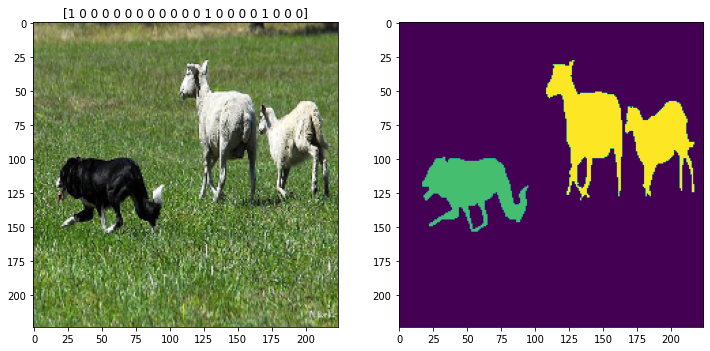

In [244]:
voc_dataset = VOC2012(root = "./data/VOCdevkit", crop_size=224 ,metadata_split='val',scale=False, flip=False)
voc_loader  = DataLoader(voc_dataset, batch_size=32, shuffle=True)

voc_sample_img, voc_sample_label, voc_sample_mask = voc_dataset[433]

voc_sample_img = (voc_sample_img.transpose(1,2,0)/255.+ voc_dataset.mean_bgr/255.)[:,:,::-1]

for i in list(np.where(voc_sample_label==1)[0]):
    print(i,voc_label_names[i],np.where(voc_sample_mask==i)[0].shape)

plt.figure(figsize=(12,24))
plt.subplot(2,2,1)
plt.title(voc_sample_label)
plt.imshow(voc_sample_img)
plt.subplot(2,2,2)
plt.imshow( np.where(voc_sample_mask==255,0,voc_sample_mask) )

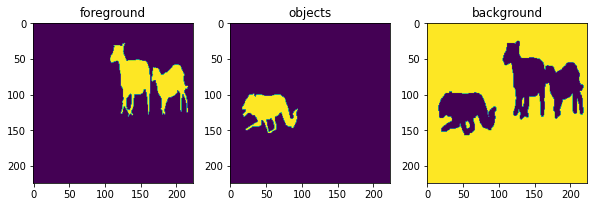

In [239]:
seg_label = np.where(voc_sample_mask==255,0,voc_sample_mask)

def divide_mask(seg_label):
    space = 0
    foreground_idx = -1
    for i in list(np.where(voc_sample_label==1)[0]):
        if(i==0):
            continue
        if( np.where(voc_sample_mask==i)[0].shape[0] > space):
            space = np.where(voc_sample_mask==i)[0].shape[0]
            foreground_idx = i

    foreground = (seg_label==foreground_idx)
    objects = ((seg_label!=foreground_idx) * (seg_label!=0))
    background = (voc_sample_mask==0)
    
    return foreground,objects,background

foreground,objects,background = divide_mask(seg_label)

plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.title("foreground")
plt.imshow(foreground )
plt.subplot(3,3,2)
plt.title("objects")
plt.imshow(objects )
plt.subplot(3,3,3)
plt.title("background")
plt.imshow(background )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


llama tensor(0.1192)
warthog tensor(0.1133)
gazelle tensor(0.0458)
bighorn tensor(0.0454)
ram tensor(0.0447)
0.0026196237
0.0
0.0


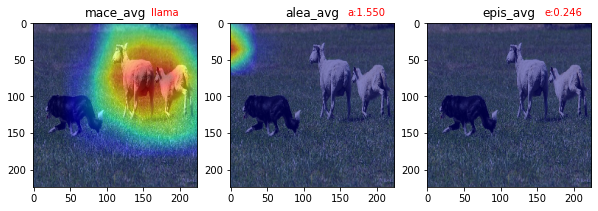

In [240]:
inp = np.array(voc_sample_img*255) - np.array((104.008, 116.669, 122.675))
inp = torch.tensor(inp)/255.
inpt = inp.permute(2,0,1).unsqueeze(0)

with torch.no_grad():
    output_dict = engine.model(inpt.cuda().float())
pi, mu, sigma = output_dict['pi'],output_dict['mu'],output_dict['sigma']
unct_out = mln_uncertainties(pi, mu, sigma)
alea , epis = float(unct_out['alea']), float(unct_out['epis'])
sel_out = mln_gather(output_dict)
mu_sel = sel_out['mu_sel'].cpu()
ind_sel = torch.topk(mu_sel,5)[-1][0]
largest_pi_ind = torch.argmax(pi)

for i in ind_sel:
    print(label_name[int(i)].split(',')[0], mu_sel[0,i])

mixture_pred_name = label_name[int(torch.argmax(mu_sel))].split(',')[0]

cam_saver = None
plt.figure(figsize=(10,30))
for i,loss_type in enumerate(loss_types):
        
    engine.localizer.register_hooks()
    engine.localizer.model_ext.loss_type= loss_type
    
    cat_label = torch.tensor([ind_sel[0]]).long()
    #cat_label = torch.tensor([895]).long()
    
    cams = engine.localizer.localize(inpt.to('cuda').float(), cat_label.to('cuda'), largest_pi_ind)
    cams = cams.cpu().detach().squeeze().numpy()
    
    print(np.median(cams))
    plt.subplot(3,3,i+1)
    plt.title(loss_type)
    plt.imshow(voc_sample_img)
    plt.imshow(cams, alpha=0.5, cmap='jet')
    if(loss_type=='alea_avg'):
        plt.text(160, -10, "a:{:.3f}".format(alea), fontsize=10, color='red')
    elif(loss_type=='epis_avg'):
        plt.text(160, -10, "e:{:.3f}".format(epis), fontsize=10, color='red')
    elif(loss_type=='mace_avg'):
        cam_saver = cams
        plt.text(160, -10, mixture_pred_name , fontsize=10, color='red')
    
    engine.localizer.remove_hooks()

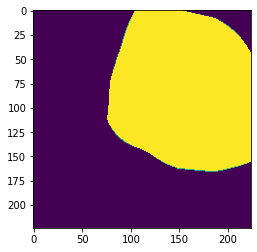

In [245]:
plt.imshow(cam_saver > np.mean(cam_saver))

calculate CAM confusion matrix

In [194]:
confusion_mat = np.zeros((3,3))

for idx,(voc_sample_img, voc_sample_label, voc_sample_mask) in enumerate(voc_dataset):
    voc_sample_img = (voc_sample_img.transpose(1,2,0)/255.+ voc_dataset.mean_bgr/255.)[:,:,::-1]
    inp = np.array(voc_sample_img*255) - np.array((104.008, 116.669, 122.675))
    inp = torch.tensor(inp)/255.
    voc_sample_mask = np.where(voc_sample_mask==255,0,voc_sample_mask)
    
    inpt = inp.permute(2,0,1).unsqueeze(0)
    
    voc_labels = list(np.where(voc_sample_label==1)[0]) 
    
    foreground_mask,objects_mask,background_mask = divide_mask(voc_sample_mask)
    masks = [foreground_mask,objects_mask,background_mask]
    
    # calc prediction, uncertainty
    with torch.no_grad():
        output_dict = engine.model(inpt.cuda().float())
    pi, mu, sigma = output_dict['pi'],output_dict['mu'],output_dict['sigma']
    largest_pi_ind = torch.argmax(pi)
    unct_out = mln_uncertainties(pi, mu, sigma)
    alea , epis = float(unct_out['alea']), float(unct_out['epis'])
    sel_out = mln_gather(output_dict)
    mu_sel = sel_out['mu_sel'].cpu()
    ind_sel = torch.topk(mu_sel,5)[-1][0]
    
    # calc cam
    for i,loss_type in enumerate(loss_types):
        
        engine.localizer.register_hooks()
        engine.localizer.model_ext.loss_type= loss_type

        pred_label = torch.tensor([ind_sel[0]]).long()
        
        cams = engine.localizer.localize(inpt.to('cuda').float(), pred_label.to('cuda'),largest_pi_ind)
        cams = cams.cpu().detach().squeeze().numpy()

        engine.localizer.remove_hooks()
        
        for m,mask in enumerate(masks):
            iou = 0.
            union = np.bitwise_or(mask, cams > np.mean(cams))
            intersection = np.bitwise_and(mask,cams > np.mean(cams))
            if(np.sum(union)!=0):
                iou = np.sum(intersection)/np.sum(union)
            #iou= iou/(255.*255.)
            if(loss_type=='mace_avg'):
                confusion_mat[0,m] += iou
            elif(loss_type=='alea_avg'):
                confusion_mat[1,m] += iou
            elif(loss_type=='epis_avg'):
                confusion_mat[2,m] += iou

In [195]:
confusion_mat[0,:]

array([384.6613719 ,  43.91162956, 424.22920502])

<AxesSubplot:>

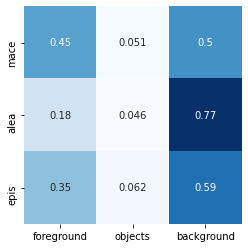

In [196]:
import seaborn as sns

for i in range(3):
    confusion_mat[i,:] /= np.sum(confusion_mat[i,:])

sns.heatmap(confusion_mat, square=True, cbar=False, annot=True, cmap='Blues',\
           xticklabels=['foreground','objects','background'],
           yticklabels=['mace','alea','epis'])

## Mask Out

In [16]:
import numpy as np

loss_types = ['mace_avg','alea_avg','epis_avg']

confusion_matrix = np.zeros((21,3))
total_images = 0

for i, (images, labels, seglabel) in enumerate(engine.dataloaders['val']):
    total_images += images.size(0)
    
    for i,loss_type in enumerate(loss_types):
        engine.localizer.register_hooks()
        engine.localizer.model_ext.loss_type= loss_type
        
        cams = engine.localizer.localize(images.to('cuda'), labels.to('cuda')) # [B X 1 X W X H]
        
        masks = cams > cams.mean(dim=[1,2,3]).view(-1,1,1,1) # [B X 1 X W X H]
        cams = cams.detach().cpu().numpy() # [B X 1 X W X H]
        masks = masks.detach().cpu().numpy()
        
        seglabel = np.where(seglabel==255, 0, seglabel)

        for b in range(images.size(0)):
            for c in range(21):
                union = np.bitwise_or(masks[b].squeeze(),seglabel[b].squeeze()==c)
                intersection = np.bitwise_and(masks[b].squeeze(),seglabel[b].squeeze()==c)
                
                if np.sum(union)==0:
                    confusion_matrix[c,i] += 0
                else:
                    confusion_matrix[c,i] += np.sum(intersection)/np.sum(union)

tensor([19, 23,  0,  6, 22,  0, 34, 25, 30, 28, 28, 28, 31,  8,  1,  6,  1, 26,
        15,  8,  3, 13, 20, 33,  5,  6, 33,  7,  0,  4, 18, 25, 11, 26,  8, 12,
        26,  9,  1, 26, 23, 17, 19, 19, 15, 21,  8,  1, 14, 12,  9,  2, 24, 29,
        21, 33,  3, 12,  5, 31, 36,  5, 30, 31])
tensor([19, 23,  0,  6, 22,  0, 34, 25, 30, 28, 28, 28, 31,  8,  1,  6,  1, 26,
        15,  8,  3, 13, 20, 33,  5,  6, 33,  7,  0,  4, 18, 25, 11, 26,  8, 12,
        26,  9,  1, 26, 23, 17, 19, 19, 15, 21,  8,  1, 14, 12,  9,  2, 24, 29,
        21, 33,  3, 12,  5, 31, 36,  5, 30, 31])
tensor([19, 23,  0,  6, 22,  0, 34, 25, 30, 28, 28, 28, 31,  8,  1,  6,  1, 26,
        15,  8,  3, 13, 20, 33,  5,  6, 33,  7,  0,  4, 18, 25, 11, 26,  8, 12,
        26,  9,  1, 26, 23, 17, 19, 19, 15, 21,  8,  1, 14, 12,  9,  2, 24, 29,
        21, 33,  3, 12,  5, 31, 36,  5, 30, 31])
tensor([32, 16,  2, 25, 27, 25, 19, 26, 14, 15, 14, 33, 30,  2, 34, 32, 16, 32,
        29,  9, 29, 23, 23, 30, 23,  9, 27,  3, 16,  

KeyboardInterrupt: 

In [ ]:
alea_diff =list()
epis_diff = list()
for i in range(len(epis_mask)):
    alea_diff.append(alea_origin[i]-alea_mask[i])
    epis_diff.append(epis_origin[i]-epis_mask[i])

In [ ]:
sum(alea_diff)/len(alea_diff),sum(epis_diff)/len(epis_diff)

In [ ]:
for i in range(len(epis_mask)):
    print(result_before['epis'][i], epis_mask[i])